

```
Project Title : Energy Consumption Prediction
Group         : 28
Group Members : EG/2019/3629 - Karunasundara K.M.S.N.
                EG/2019/3633 - Kavinda B.G.K.
Github        : https://github.com/saranga97/Energy-consumption-prediction-using-LR-RF
```


# 1. Import libraries and input dataset


In [80]:
# Importing common libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [81]:
# Read data csv from github
url = 'https://raw.githubusercontent.com/saranga97/Energy-consumption-prediction-using-LR-RF/master/Data/Energy_consumption.csv'
df = pd.read_csv(url)

In [82]:
# Read first 5 datapoints of the dataset
df.head(5)


,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


# 2. Preprocessing data

In [83]:
# Check whether if any column have null value and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [84]:
# Drop the 'Timestamp' column as it's not needed
df.drop('Timestamp', inplace=True, axis=1)

In [85]:
# Perform one-hot encoding for categorical variables
df = pd.get_dummies(data=df)

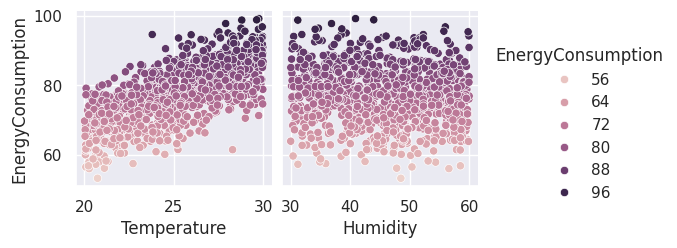

In [86]:
# Exploratory Data Analysis (EDA) - Data pairplot
import seaborn as sns
sns.pairplot(df, x_vars=["Temperature", "Humidity"], y_vars=["EnergyConsumption"], hue="EnergyConsumption")


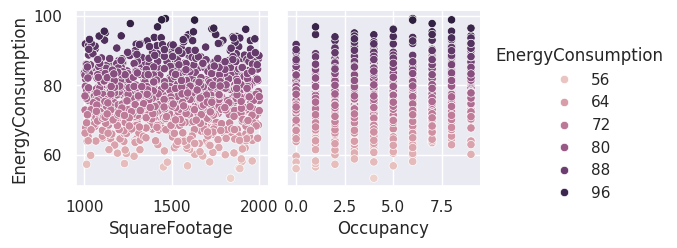

In [87]:
sns.pairplot(df, x_vars=["SquareFootage", "Occupancy"], y_vars=["EnergyConsumption"], hue="EnergyConsumption")

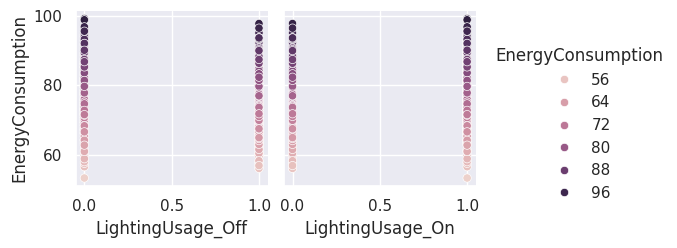

In [88]:
sns.pairplot(df, x_vars=["LightingUsage_Off", "LightingUsage_On"], y_vars=["EnergyConsumption"], hue="EnergyConsumption")

<Axes: >

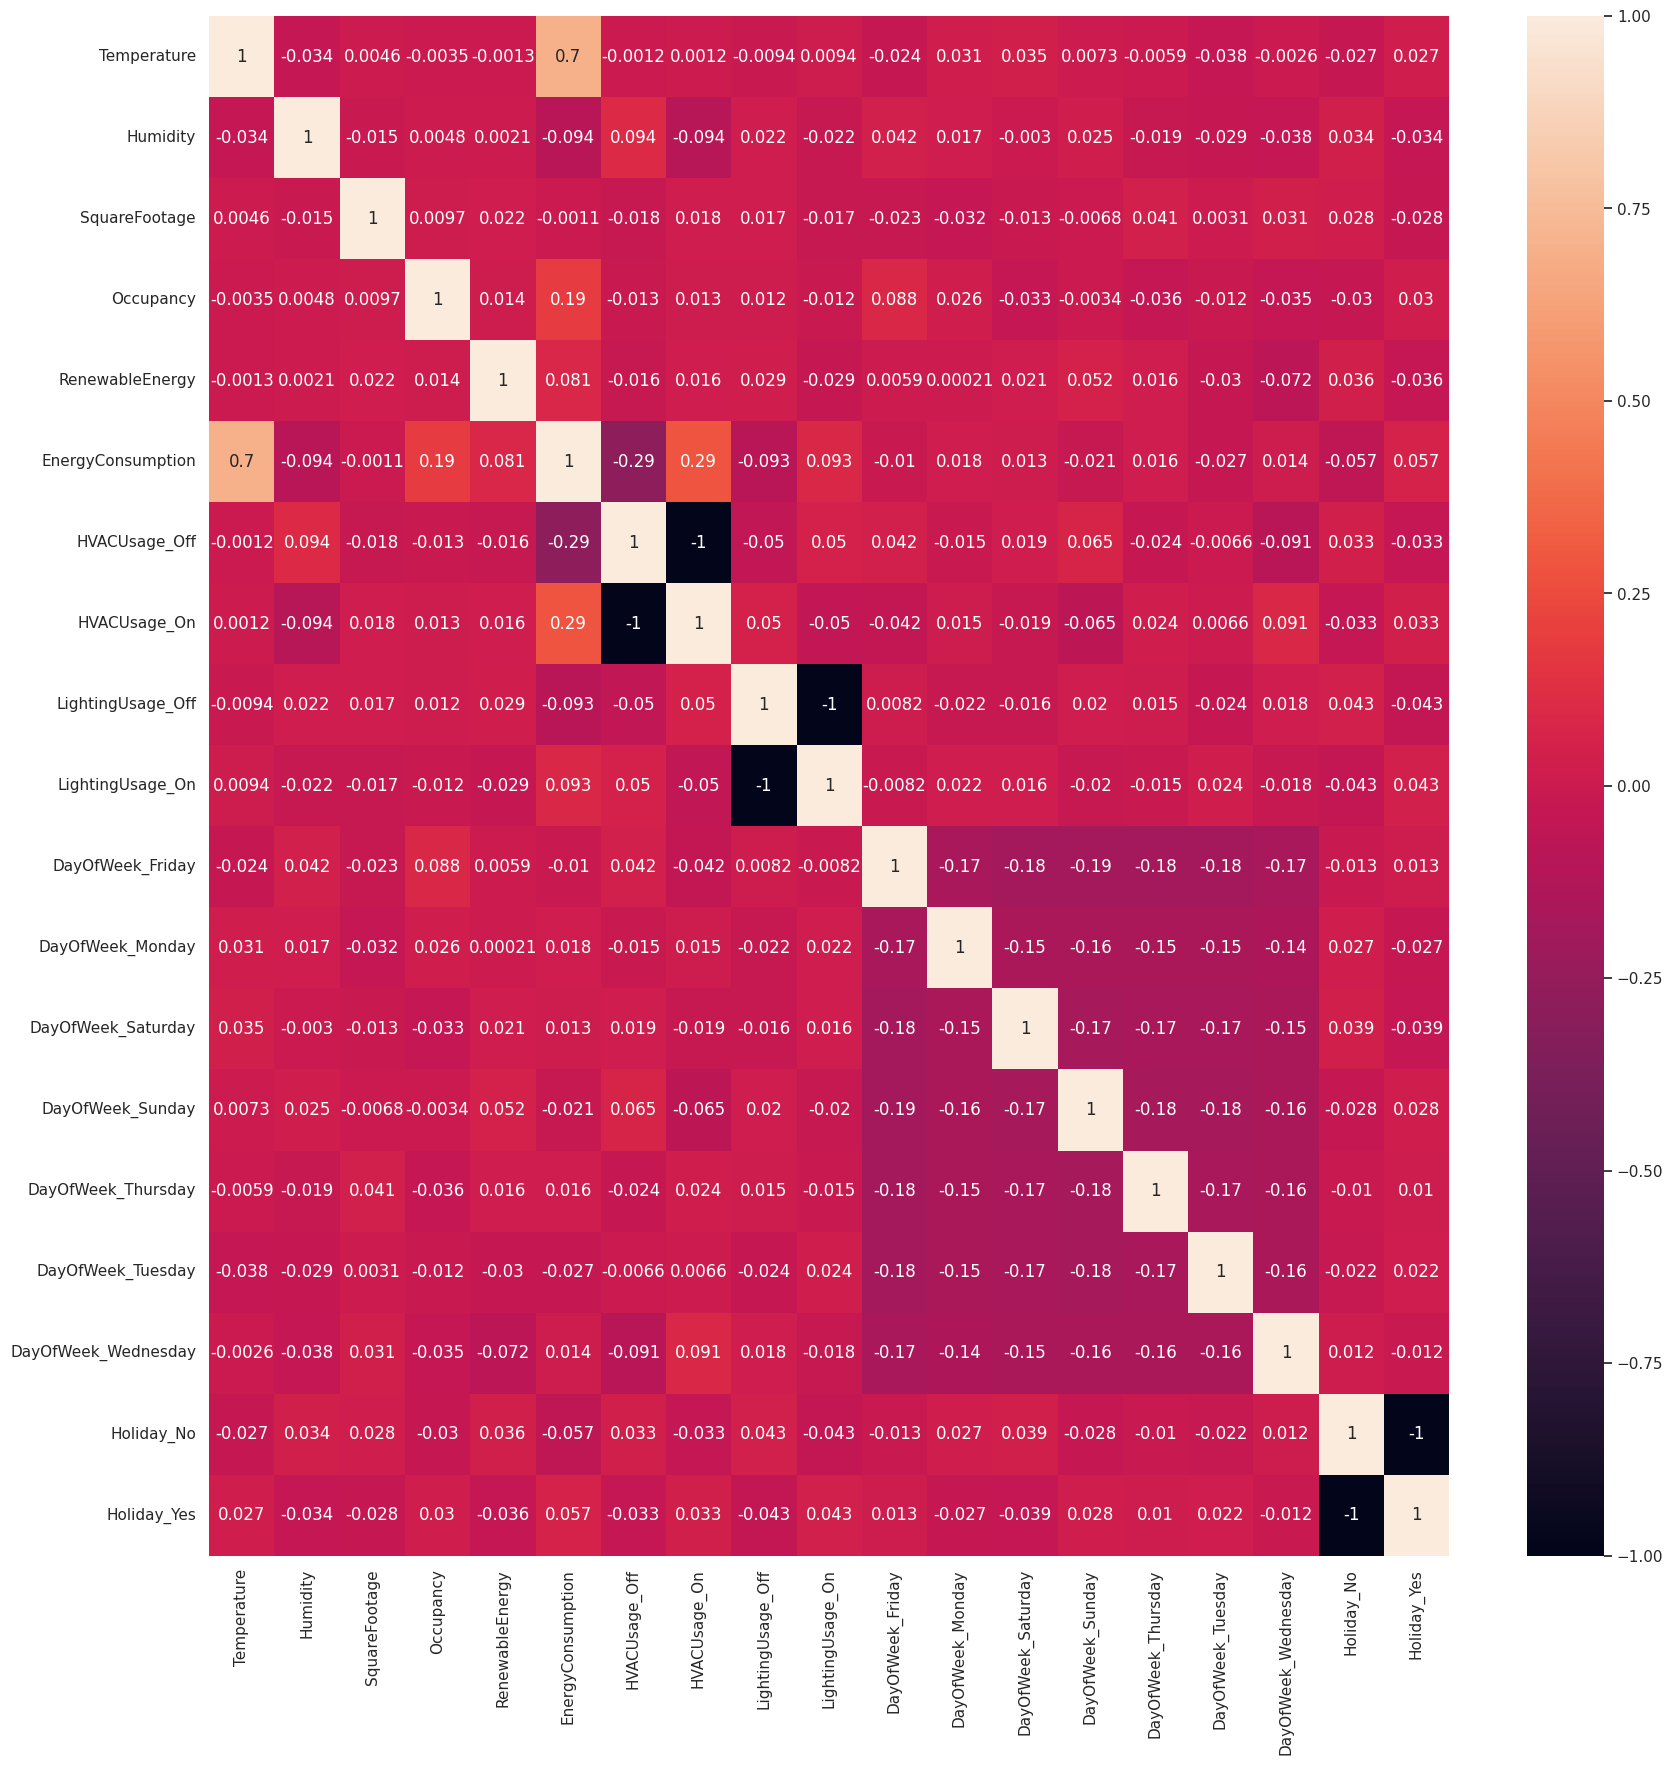

In [89]:
# Calculate the correlation matrix for the dataset
corr_matrix = df.corr()

# Set the figure size
sns.set(rc={'figure.figsize':(20 , 20)})

# Draw the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True)

In [90]:
# Split all the data points in to X and y
X = df.drop("EnergyConsumption", axis=1)
y = df["EnergyConsumption"]

In [91]:
# Split data in to training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

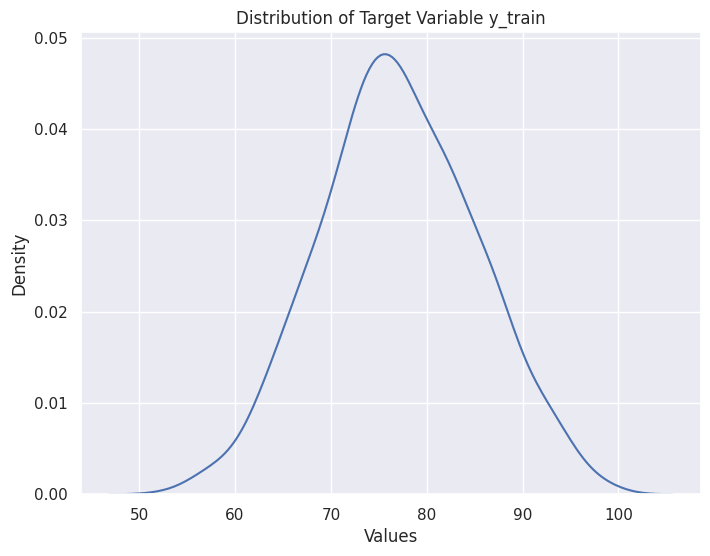

In [92]:
# Check data distribution in each y_train and y_test
import matplotlib.pyplot as plt

# Plotting the hist plot
plt.figure(figsize=(8, 6))
sns.kdeplot(y_train)

plt.title('Distribution of Target Variable y_train')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

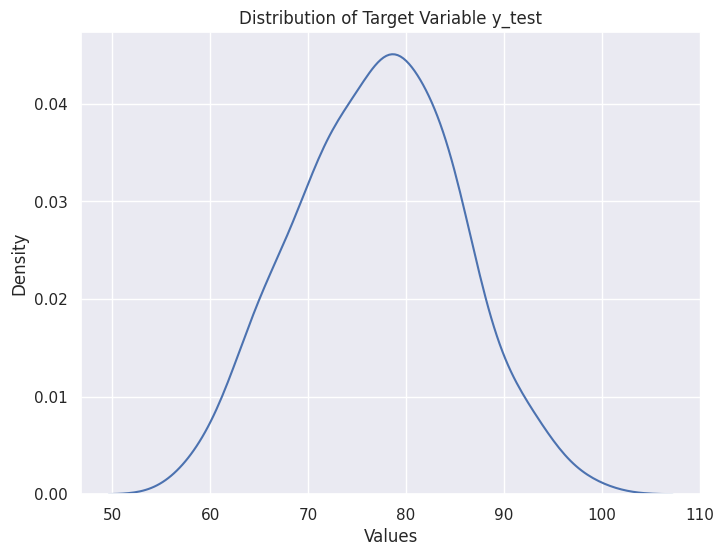

In [93]:
# Check data distribution in each y_train and y_test
import matplotlib.pyplot as plt

# Plotting the hist plot
plt.figure(figsize=(8, 6))
sns.kdeplot(y_test)

plt.title('Distribution of Target Variable y_test')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

In [94]:
# Feature scaling using standard scaler from sklearn to standardize the data in a fixed range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

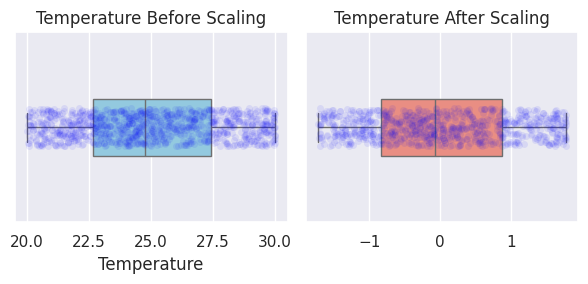

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots of Temperature before and after scaling
plt.figure(figsize=(6, 3))

# Before scaling
plt.subplot(1, 2, 1)
sns.boxplot(x=df["Temperature"], color="skyblue", width=0.3)  # Customize boxplot appearance
sns.stripplot(x=df["Temperature"], color="blue", alpha=0.08)  # Add data points as a strip plot
plt.title("Temperature Before Scaling")

# After scaling
plt.subplot(1, 2, 2)
sns.boxplot(x=X_train_scaled[:, 0], color="salmon", width=0.3)  # Customize boxplot appearance
sns.stripplot(x=X_train_scaled[:, 0], color="blue", alpha=0.08)  # Add data points as a strip plot
plt.title("Temperature After Scaling")

plt.tight_layout()  # Ensures tight layout to prevent overlapping
plt.show()


<Axes: xlabel='EnergyConsumption'>

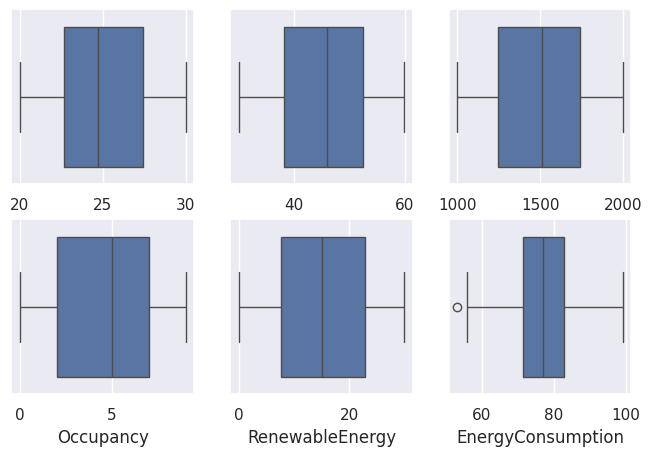

In [96]:
# Before scaling
fig, axes = plt.subplots(2, 3, figsize=(8, 5))

# Plot boxplots for features and target variable before scaling
sns.boxplot(x=df['Temperature'], ax=axes[0][0])
sns.boxplot(x=df['Humidity'], ax=axes[0][1])
sns.boxplot(x=df['SquareFootage'], ax=axes[0][2])
sns.boxplot(x=df['Occupancy'], ax=axes[1][0])
sns.boxplot(x=df['RenewableEnergy'], ax=axes[1][1])
sns.boxplot(x=df['EnergyConsumption'],ax=axes[1][2])

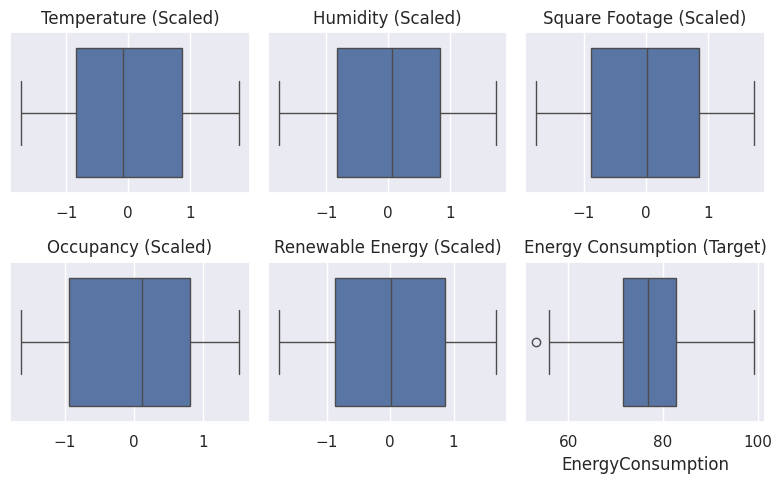

In [97]:
# After scaling
fig, axes = plt.subplots(2, 3, figsize=(8, 5))

# Plot boxplots for scaled features and target variable
sns.boxplot(x=X_train_scaled[:, 0], ax=axes[0][0])
sns.boxplot(x=X_train_scaled[:, 1], ax=axes[0][1])
sns.boxplot(x=X_train_scaled[:, 2], ax=axes[0][2])
sns.boxplot(x=X_train_scaled[:, 3], ax=axes[1][0])
sns.boxplot(x=X_train_scaled[:, 4], ax=axes[1][1])
sns.boxplot(x=y_train, ax=axes[1][2])

# Added captions for each feature scaled plot
axes[0][0].set_title('Temperature (Scaled)')
axes[0][1].set_title('Humidity (Scaled)')
axes[0][2].set_title('Square Footage (Scaled)')
axes[1][0].set_title('Occupancy (Scaled)')
axes[1][1].set_title('Renewable Energy (Scaled)')
axes[1][2].set_title('Energy Consumption (Target)')

plt.tight_layout()
plt.show()

# 3. Model Build

Model built using of two regression algorithms : Linear regression and Random forest regression

In [100]:
# Linear regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train) # Train the Liner Regression model with the best parameters
lr_predictions = lr_model.predict(X_test_scaled) # Make predictions using the trained Liner Regression model

In [101]:
# Random forest regression
rf_model = RandomForestRegressor(random_state=42) # Initialize Random Forest Regressor
rf_model.fit(X_train_scaled,y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# 4. Model evaluation

In [106]:
# Evaluation metrics import
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# for Linear regression
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2  = r2_score(y_test, lr_predictions)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)

# print evaluation metrics for linera regression

print(f'Linear regression MSE: {lr_mse}')
print(f'Linear regression MAE: {lr_mae}')
print(f'Linear regression R-squared error: {lr_r2}')
print(f'Linear regression RMSE: {lr_rmse}')

Linear regression MSE: 26.51953131219383
Linear regression MAE: 4.121254457226358
Linear regression R-squared error: 0.5951208900046383
Linear regression RMSE: 5.149711769817203


In [108]:
# for Random forest regression
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2  = r2_score(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)

# print evaluation metrics for linera regression
print(f'Random forest regression MSE: {rf_mse}')
print(f'Random forest regression MAE: {rf_mae}')
print(f'Random forest regression R-squared error: {rf_r2}')
print(f'Random forest regression RMSE: {rf_rmse}')

Random forest regression MSE: 29.947677697259383
Random forest regression MAE: 4.406812620621577
Random forest regression R-squared error: 0.5427826778024885
Random forest regression RMSE: 5.472447139740994


# 5. Hyper parameter testing

In [113]:

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # Additional valid parameter for LinearRegression
}

# Create the GridSearchCV object for Linear Regression
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params_lr = grid_search_lr.best_params_

# Print the best hyperparameters for Linear Regression
print("Best hyperparameters for Linear Regression:")
print(best_params_lr)


Best hyperparameters for Linear Regression:
{'fit_intercept': True, 'positive': True}


In [114]:
# Define the hyperparameter grid for Random Forest Regression
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create the GridSearchCV object for RF
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train)

# best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Print the best hyperparameters for RF
print("Best hyperparameters for Random Forest Regression:")
print(best_params_rf)

Best hyperparameters for Random Forest Regression:
{'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}


In [117]:
# Best hyperparameters obtained from GridSearchCV
best_params_rf = {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}

# RandomForestRegressor with best hyperparameters
rf_model_best_hyperparams = RandomForestRegressor(**best_params_rf)
rf_model_best_hyperparams.fit(X_train_scaled, y_train)

# predictions using the trained model
rf_predictions = rf_model_best_hyperparams.predict(X_test_scaled)


In [120]:
# for Random forest regression with best hyper parameters
rf_mse_best_hyperparams = mean_squared_error(y_test, rf_predictions)
rf_mae_best_hyperparams = mean_absolute_error(y_test, rf_predictions)
rf_r2_best_hyperparams  = r2_score(y_test, rf_predictions)
rf_rmse_best_hyperparams = mean_squared_error(y_test, rf_predictions, squared=False)

# print evaluation metrics for linera regression
print(f'Random forest regression MSE: {rf_mse_best_hyperparams}')
print(f'Random forest regression MAE: {rf_mae_best_hyperparams}')
print(f'Random forest regression R-squared error: {rf_r2_best_hyperparams}')
print(f'Random forest regression RMSE: {rf_rmse_best_hyperparams}')

Random forest regression MSE: 29.253776982352605
Random forest regression MAE: 4.2686008245295355
Random forest regression R-squared error: 0.5533766019774389
Random forest regression RMSE: 5.40867608406647


# 6. Prediction

In [124]:
# predicting values by two algorithms
linear_regression_predictions = lr_model.predict(X_test_scaled)
random_forest_predictions = rf_model_best_hyperparams.predict(X_test_scaled)

# Create a dataframe to compare actual and predicted values
prediction_df = pd.DataFrame({'Actual': y_test, 'Linear Regression': linear_regression_predictions, 'Random Forest': random_forest_predictions})

# Print the dataframe
print(prediction_df.to_string())


        Actual  Linear Regression  Random Forest
521  86.920611          83.843847      82.783182
737  88.351606          81.599707      82.582565
740  79.431363          76.195410      73.680150
660  90.009188          88.365332      86.877820
411  83.891100          75.201269      74.504548
678  87.549041          80.789160      82.986137
626  79.697237          78.568457      77.882991
513  80.914057          72.935644      74.145816
859  85.133856          77.453222      79.493869
136  71.017140          68.021582      68.119407
811  79.558214          78.171972      78.840628
76   69.365745          73.318457      71.904269
636  80.821657          78.859472      78.794425
973  85.556236          78.724707      78.888472
938  71.081568          76.818457      79.145865
899  72.992079          71.271582      73.569141
280  71.568813          78.406347      75.614505
883  81.097206          78.318457      78.071535
761  73.976840          75.420019      77.783835
319  70.016667      